# Lab02: Ensaio em motores da Aula 2
---

O objetivo deste ensaio é demonstrar a possibilidade de detectar anomalias no
funcionamento de um motor de indução trifásico (MIT), decorrentes de uma não conformidade das
tensões de alimentação do equipamento, através da análise do sinal de corrente de uma das fases do
motor.

---

## Importanto Bibliotecas

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc

In [231]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = '12')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('legend', fancybox = 'False', frameon = "True", framealpha = "1.0", edgecolor="0")

## Condição Normal:


### Operando em vazio

In [166]:
file_name = "https://raw.githubusercontent.com/DarcioMBSilva/Manu/main/Dados_Aula_02_vazio_60Hz_N.lvm"
cond_norm_vazio = pd.read_table(file_name, sep="\t", header=22)
cond_norm_vazio = cond_norm_vazio.rename(columns={"X_Value":"tempo"})
cond_norm_vazio = cond_norm_vazio.drop(columns=["Comment"])
cond_norm_vazio = cond_norm_vazio.apply(lambda x: x.str.replace(',','.'))
cond_norm_vazio = cond_norm_vazio.apply(pd.to_numeric)

# ganhos de tensão 
cond_norm_vazio["VA"] = cond_norm_vazio["VA"]*78.71
cond_norm_vazio["VB"] = cond_norm_vazio["VB"]*80.418
cond_norm_vazio["VC"] = cond_norm_vazio["VC"]*80.667

# ganhos de corrente
cond_norm_vazio["IA"] = cond_norm_vazio["IA"]*4.306
cond_norm_vazio["IB"] = cond_norm_vazio["IB"]*4.302
cond_norm_vazio["IC"] = cond_norm_vazio["IC"]*4.291

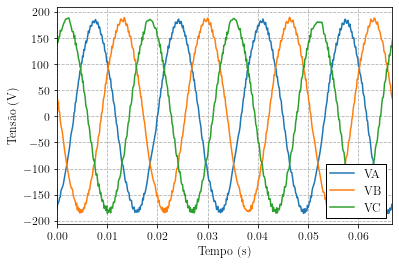

In [167]:
f1, ax1 = plt.subplots()
ax1.plot(cond_norm_vazio["tempo"], cond_norm_vazio[["VA", "VB", "VC"]])
ax1.legend(["VA", "VB", "VC"], loc = 4)
ax1.grid(True, linestyle="--")
ax1.set_xlim(0, 4/60)
ax1.set_ylabel('Tensão (V)')
ax1.set_xlabel('Tempo (s)')

plt.savefig("ten_1.pdf", bbox_inches='tight')

In [168]:
# valores rms

va_rms = np.sqrt((cond_norm_vazio["VA"]**2).mean())
vb_rms = np.sqrt((cond_norm_vazio["VB"]**2).mean())
vc_rms = np.sqrt((cond_norm_vazio["VC"]**2).mean())

print(va_rms, vb_rms, vc_rms)

127.53746607651568 128.4301502325856 128.15236475072413


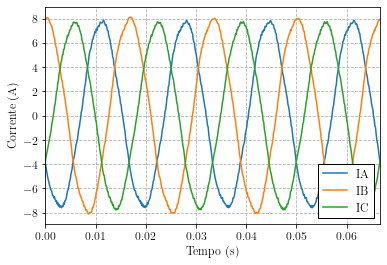

In [169]:
f2, ax2 = plt.subplots()
ax2.plot(cond_norm_vazio["tempo"], cond_norm_vazio[["IA", "IB", "IC"]])
ax2.legend(["IA", "IB", "IC"], loc = 4)
ax2.grid(True, linestyle="--")
ax2.set_ylabel('Corrente (A)')
ax2.set_xlabel('Tempo (s)')
ax2.set_xlim(0, 4/60)

plt.savefig("cor_1.pdf", bbox_inches='tight')

In [170]:
# valores rms de corrente

ia_rms = np.sqrt((cond_norm_vazio["IA"]**2).mean())
ib_rms = np.sqrt((cond_norm_vazio["IB"]**2).mean())
ic_rms = np.sqrt((cond_norm_vazio["IC"]**2).mean())

print(ia_rms, ib_rms, ic_rms)

5.359083992979422 5.601895515733881 5.314483172284241


### Operando em carga

In [171]:
file_name = "https://raw.githubusercontent.com/DarcioMBSilva/Manu/main/Dados_Aula_02_carga_58_5Hz_N.lvm"
cond_norm_carga = pd.read_table(file_name, sep="\t", header=22)
cond_norm_carga = cond_norm_carga.rename(columns={"X_Value":"tempo"})
cond_norm_carga = cond_norm_carga.drop(columns=["Comment"])
cond_norm_carga = cond_norm_carga.apply(lambda x: x.str.replace(',','.'))
cond_norm_carga = cond_norm_carga.apply(pd.to_numeric)

# ganhos de tensão 
cond_norm_carga["VA"] = cond_norm_carga["VA"]*78.71
cond_norm_carga["VB"] = cond_norm_carga["VB"]*80.418
cond_norm_carga["VC"] = cond_norm_carga["VC"]*80.667

# ganhos de corrente
cond_norm_carga["IA"] = cond_norm_carga["IA"]*4.306
cond_norm_carga["IB"] = cond_norm_carga["IB"]*4.302
cond_norm_carga["IC"] = cond_norm_carga["IC"]*4.291

cond_norm_carga

,tempo,VA,IA,VB,IB,VC,IC
0,0.000000,-142.784820,-2.790611,155.479840,11.579964,-5.899662,-8.495060
1,0.000130,-137.118408,-3.246401,149.214714,11.616734,-7.092969,-7.946353
2,0.000260,-149.563719,-3.932911,143.108174,11.786435,7.146774,-7.586660
3,0.000391,-153.962348,-4.375960,143.108174,11.869872,19.132518,-7.210043
4,0.000521,-154.738508,-4.684536,142.103592,11.666228,25.443662,-6.559772
...,...,...,...,...,...,...,...
15867,2.065883,-87.000603,1.232201,173.323709,9.320120,-80.810829,-10.310449
15868,2.066014,-100.144543,0.912304,177.368332,9.699117,-71.238076,-10.356998
15869,2.066144,-107.854975,0.283826,171.579041,10.178523,-57.740874,-10.132716
15870,2.066274,-105.345228,-0.314924,167.005669,10.434488,-56.600565,-9.825214


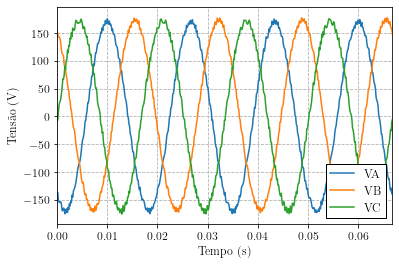

In [172]:
f3, ax3 = plt.subplots()
ax3.plot(cond_norm_carga["tempo"], cond_norm_carga[["VA", "VB", "VC"]])
ax3.legend(["VA", "VB", "VC"], loc = 4)
ax3.grid(True, linestyle="--")
ax3.set_ylabel('Tensão (V)')
ax3.set_xlabel('Tempo (s)')
ax3.set_xlim(0, 4/60)

plt.savefig("ten_2.pdf", bbox_inches='tight')

In [173]:
# valores rms

va_rms = np.sqrt((cond_norm_carga["VA"]**2).mean())
vb_rms = np.sqrt((cond_norm_carga["VB"]**2).mean())
vc_rms = np.sqrt((cond_norm_carga["VC"]**2).mean())

print(va_rms, vb_rms, vc_rms)

119.72221310330971 120.32659190658822 120.39871397339051


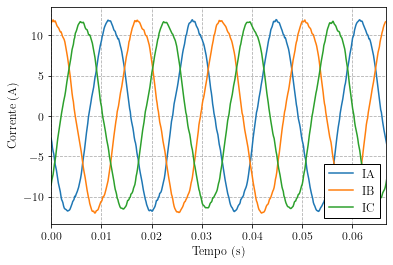

In [174]:
f4, ax4 = plt.subplots()
ax4.plot(cond_norm_carga["tempo"], cond_norm_carga[["IA", "IB", "IC"]])
ax4.legend(["IA", "IB", "IC"], loc = 4)
ax4.grid(True, linestyle="--")
ax4.set_ylabel('Corrente (A)')
ax4.set_xlabel('Tempo (s)')
ax4.set_xlim(0, 4/60)

plt.savefig("cor_2.pdf", bbox_inches='tight')

In [175]:
# valores rms de corrente

ia_rms = np.sqrt((cond_norm_carga["IA"]**2).mean())
ib_rms = np.sqrt((cond_norm_carga["IB"]**2).mean())
ic_rms = np.sqrt((cond_norm_carga["IC"]**2).mean())

print(ia_rms, ib_rms, ic_rms)

8.28881448816824 8.395330566283565 8.17523563816637


## Motor com defeito:

### Operando em vazio

In [176]:
file_name = "https://raw.githubusercontent.com/DarcioMBSilva/Manu/main/Dados_Aula_02_vazio_60Hz_D.lvm"
cond_def_vazio = pd.read_table(file_name, sep="\t", header=22)
cond_def_vazio = cond_def_vazio.rename(columns={"X_Value":"tempo"})
cond_def_vazio = cond_def_vazio.drop(columns=["Comment"])
cond_def_vazio = cond_def_vazio.apply(lambda x: x.str.replace(',','.'))
cond_def_vazio = cond_def_vazio.apply(pd.to_numeric)

# ganhos de tensão 
cond_def_vazio["VA"] = cond_def_vazio["VA"]*78.71
cond_def_vazio["VB"] = cond_def_vazio["VB"]*80.418
cond_def_vazio["VC"] = cond_def_vazio["VC"]*80.667

# ganhos de corrente
cond_def_vazio["IA"] = cond_def_vazio["IA"]*4.306
cond_def_vazio["IB"] = cond_def_vazio["IB"]*4.302
cond_def_vazio["IC"] = cond_def_vazio["IC"]*4.291

cond_def_vazio

,tempo,VA,IA,VB,IB,VC,IC
0,0.000000,-76.625208,7.290484,189.766536,-4.107442,-52.410883,-2.662402
1,0.000130,-80.532136,6.637944,197.459242,-3.818950,-52.251807,-2.851421
2,0.000260,-90.493595,6.303889,190.374496,-3.295706,-43.660207,-2.745626
3,0.000391,-96.160007,5.836779,195.793785,-2.769636,-35.386838,-2.675100
4,0.000521,-97.143174,5.230950,190.400954,-2.310028,-34.723917,-2.744215
...,...,...,...,...,...,...,...
15867,2.065883,52.356160,11.051431,138.852051,-8.579061,-145.300708,-2.347851
15868,2.066014,43.998969,10.918375,144.509216,-8.338648,-141.296640,-2.447998
15869,2.066144,35.978026,10.773995,151.752465,-8.116626,-136.947801,-2.532634
15870,2.066274,28.396994,10.625369,159.524463,-7.924297,-132.068658,-2.548150


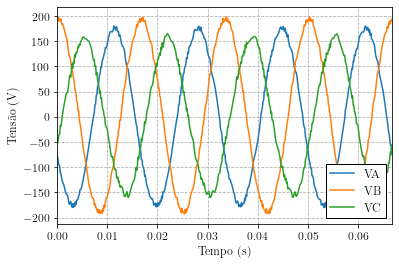

In [177]:
f5, ax5 = plt.subplots()
ax5.plot(cond_def_vazio["tempo"], cond_def_vazio[["VA", "VB", "VC"]])
ax5.legend(["VA", "VB", "VC"], loc = 4)
ax5.grid(True, linestyle="--")
ax5.set_ylabel('Tensão (V)')
ax5.set_xlabel('Tempo (s)')
ax5.set_xlim(0, 4/60)

plt.savefig("ten_3.pdf", bbox_inches='tight')

In [178]:
# valores rms

va_rms = np.sqrt((cond_def_vazio["VA"]**2).mean())
vb_rms = np.sqrt((cond_def_vazio["VB"]**2).mean())
vc_rms = np.sqrt((cond_def_vazio["VC"]**2).mean())

print(va_rms, vb_rms, vc_rms)

123.7783954652167 134.31911324968752 108.72304093605635


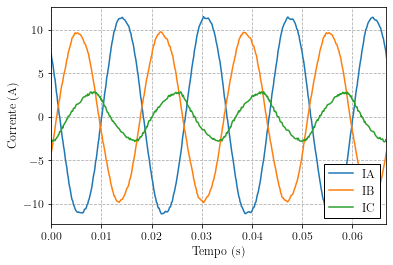

In [179]:
f6, ax6 = plt.subplots()
ax6.plot(cond_def_vazio["tempo"], cond_def_vazio[["IA", "IB", "IC"]])
ax6.legend(["IA", "IB", "IC"], loc = 4)
ax6.grid(True, linestyle="--")
ax6.set_ylabel('Corrente (A)')
ax6.set_xlabel('Tempo (s)')
ax6.set_xlim(0, 4/60)

plt.savefig("cor_3.pdf", bbox_inches='tight')

In [180]:
# valores rms

ia_rms = np.sqrt((cond_def_vazio["IA"]**2).mean())
ib_rms = np.sqrt((cond_def_vazio["IB"]**2).mean())
ic_rms = np.sqrt((cond_def_vazio["IC"]**2).mean())

print(ia_rms, ib_rms, ic_rms)

8.143277514266842 6.862935153128412 1.9130902311159776


### Operando em carga

In [181]:
file_name = "https://raw.githubusercontent.com/DarcioMBSilva/Manu/main/Dados_Aula_02_carga_59Hz_D.lvm"
cond_def_carga = pd.read_table(file_name, sep="\t", header=22)
cond_def_carga = cond_def_carga.rename(columns={"X_Value":"tempo"})
cond_def_carga = cond_def_carga.drop(columns=["Comment"])
cond_def_carga = cond_def_carga.apply(lambda x: x.str.replace(',','.'))
cond_def_carga = cond_def_carga.apply(pd.to_numeric)
cond_def_carga[["VA", "VB", "VC"]] = cond_def_carga[["VA", "VB", "VC"]]

# ganhos de tensão 
cond_def_carga["VA"] = cond_def_carga["VA"]*78.71
cond_def_carga["VB"] = cond_def_carga["VB"]*80.418
cond_def_carga["VC"] = cond_def_carga["VC"]*80.667

# ganhos de corrente
cond_def_carga["IA"] = cond_def_carga["IA"]*4.306
cond_def_carga["IB"] = cond_def_carga["IB"]*4.302
cond_def_carga["IC"] = cond_def_carga["IC"]*4.291

cond_def_carga

,tempo,VA,IA,VB,IB,VC,IC
0,0.000000,41.799654,-4.961972,-178.213686,1.666621,71.557034,3.125110
1,0.000130,42.679396,-4.383034,-176.468938,1.383790,74.500492,3.082792
2,0.000260,56.159664,-3.988114,-181.888226,0.975091,64.636047,2.992513
3,0.000391,54.865986,-3.185531,-174.724189,0.318916,67.977274,2.680781
4,0.000521,63.171465,-2.129580,-180.354977,-0.546556,63.522358,2.511514
...,...,...,...,...,...,...,...
15867,2.065883,-73.132216,-9.633082,-117.253706,6.490363,126.765851,3.206922
15868,2.066014,-64.464435,-9.103689,-121.403999,6.148134,123.955010,3.079968
15869,2.066144,-55.615541,-8.584205,-127.933538,5.640447,121.886708,3.039062
15870,2.066274,-46.507929,-8.108603,-134.780327,5.211950,119.526633,3.089842


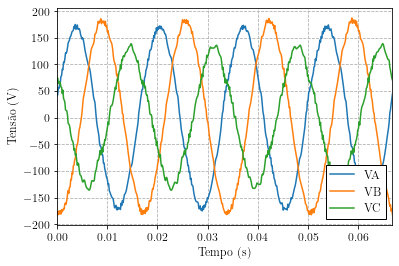

In [182]:
f7, ax7 = plt.subplots()
ax7.plot(cond_def_vazio["tempo"], cond_def_carga[["VA", "VB", "VC"]])
ax7.grid(True, linestyle="--")
ax7.legend(["VA", "VB", "VC"], loc = 4)
ax7.set_ylabel('Tensão (V)')
ax7.set_xlabel('Tempo (s)')
ax7.set_xlim(0, 4/60)

plt.savefig("ten_4.pdf", bbox_inches='tight')

In [183]:
# valores rms

va_rms = np.sqrt((cond_def_carga["VA"]**2).mean())
vb_rms = np.sqrt((cond_def_carga["VB"]**2).mean())
vc_rms = np.sqrt((cond_def_carga["VC"]**2).mean())

print(va_rms, vb_rms, vc_rms)

119.79502969507487 125.96461856787651 90.16877034181289


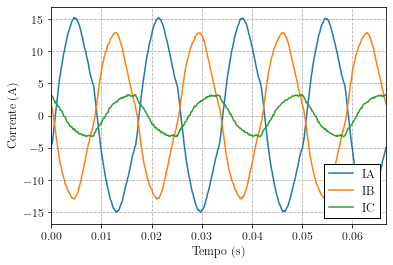

In [184]:
f8, ax8 = plt.subplots()
ax8.plot(cond_def_carga["tempo"], cond_def_carga[["IA", "IB", "IC"]])
ax8.legend(["IA", "IB", "IC"], loc = 4)
ax8.grid(True, linestyle="--")
ax8.set_ylabel('Corrente (A)')
ax8.set_xlabel('Tempo (s)')
ax8.set_xlim(0, 4/60)

plt.savefig("cor_4.pdf", bbox_inches='tight')

In [185]:
# valores rms

ia_rms = np.sqrt((cond_def_carga["IA"]**2).mean())
ib_rms = np.sqrt((cond_def_carga["IB"]**2).mean())
ic_rms = np.sqrt((cond_def_carga["IC"]**2).mean())

print(ia_rms, ib_rms, ic_rms)

10.326726874990198 8.777131553357993 2.2770883828056845


## FFT

In [186]:
def to_db(amp_lin):
  amp_db = 20*np.log10(abs(amp_lin))
  return amp_db

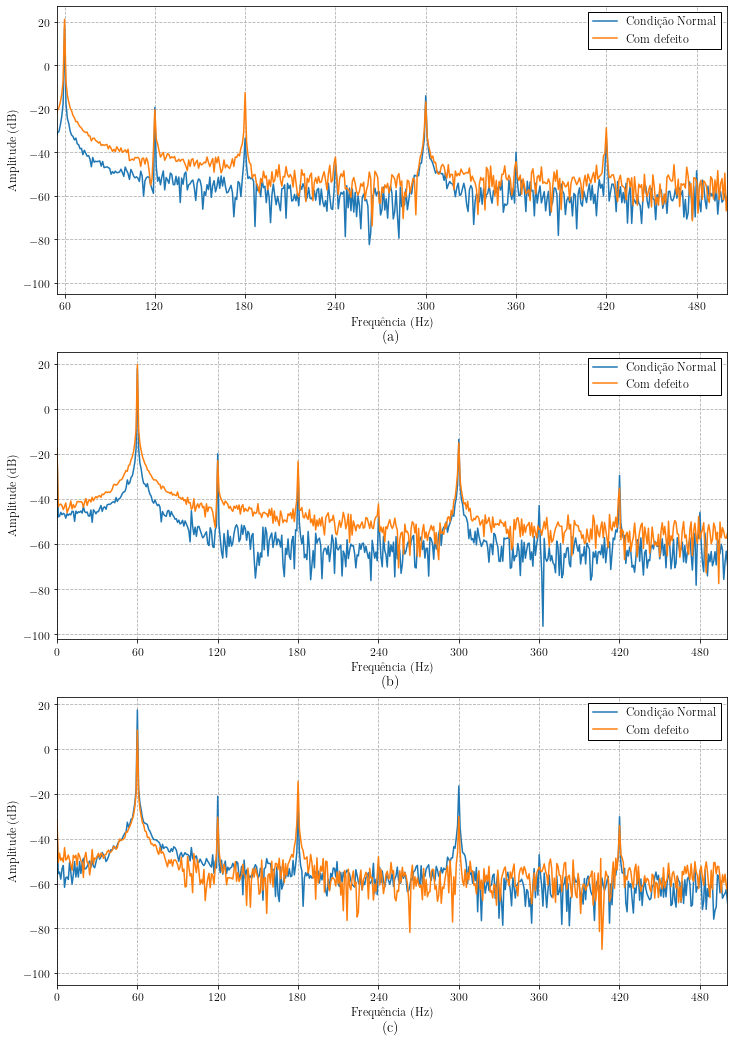

In [227]:
# sistema operando em vazio

# obtenção do sample time e do número de amostras da FFT
N = cond_norm_vazio["tempo"].size
ini = cond_norm_vazio["tempo"].iloc[0]
fim = cond_norm_vazio["tempo"].iloc[-1]
Ts = (fim - ini)/N
n = 8192
nn = 4096

# operando em condição normal
yf_a_n = np.fft.fft(cond_norm_vazio["IA"], n)
yf_b_n = np.fft.fft(cond_norm_vazio["IB"], n)
yf_c_n = np.fft.fft(cond_norm_vazio["IC"], n)

yf_a_n = np.abs(yf_a_n[0:nn])/nn
yf_b_n = np.abs(yf_b_n[0:nn])/nn
yf_c_n = np.abs(yf_c_n[0:nn])/nn

# operando com defeito
yf_a_d = np.fft.fft(cond_def_vazio["IA"], n)
yf_b_d = np.fft.fft(cond_def_vazio["IB"], n)
yf_c_d = np.fft.fft(cond_def_vazio["IC"], n)

yf_a_d = np.abs(yf_a_d[0:nn])/nn
yf_b_d = np.abs(yf_b_d[0:nn])/nn
yf_c_d = np.abs(yf_c_d[0:nn])/nn

# obtenção do vetor de frequência
xf = np.fft.fftfreq(n, Ts)
xf = xf[0:nn]
mx = 500
k = np.arange(0, mx, 60)

#plot dos sinais, operando em condição normal e com defeito 
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

ax[0].plot(xf, to_db(yf_a_n), xf, to_db(yf_a_d))
ax[0].grid(True, linestyle="--")
ax[0].set_xticks(k)
ax[0].set_xlim(55, mx)
ax[0].set_title("(a)", y=-0.1825)
ax[0].set_xlabel('Frequência (Hz)')
ax[0].set_ylabel('Amplitude (dB)')
ax[0].legend(["Condição Normal", "Com defeito"])

ax[1].plot(xf, to_db(yf_b_n), xf, to_db(yf_b_d))
ax[1].grid(True, linestyle="--")
ax[1].set_xticks(k)
ax[1].set_title("(b)", y=-0.1825)
ax[1].set_xlim(0, mx)
ax[1].set_xlabel('Frequência (Hz)')
ax[1].set_ylabel('Amplitude (dB)')
ax[1].legend(["Condição Normal", "Com defeito"])

ax[2].plot(xf, to_db(yf_c_n), xf, to_db(yf_c_d))
ax[2].grid(True, linestyle="--")
ax[2].set_xticks(k)
ax[2].set_xlim(0, mx)
ax[2].set_title("(c)", y=-0.1825)
ax[2].set_ylabel('Amplitude (dB)')
ax[2].set_xlabel('Frequência (Hz)')
ax[2].legend(["Condição Normal", "Com defeito"])

plt.savefig("fft_1.pdf", bbox_inches='tight')
#files.download("fft_vazio.pdf")

Text(0.5, 0, 'Frequência [Hz]')

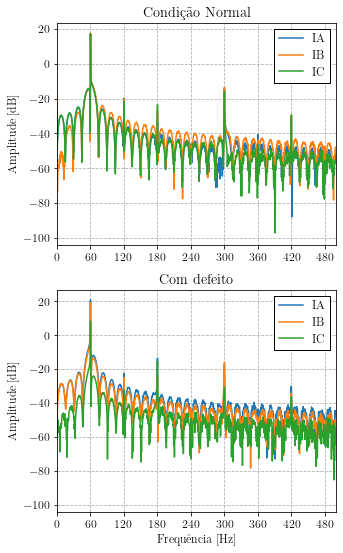

In [203]:
fig, ax = plt.subplots(2, 1, figsize=(5, 9))

ax[0].plot(xf, to_db(yf_a_n), xf, to_db(yf_b_n), xf, to_db(yf_c_n))
ax[0].grid(True, linestyle="--")
ax[0].set_xticks(k)
ax[0].set_xlim(0, 500)
ax[0].set_title("Condição Normal")
ax[0].set_ylabel('Amplitude [dB]')
ax[0].legend(['IA', 'IB', 'IC'])

ax[1].plot(xf, to_db(yf_a_d), xf, to_db(yf_b_d), xf, to_db(yf_c_d))
ax[1].grid(True, linestyle="--")
ax[1].set_xticks(k)
ax[1].set_xlim(0, 500)
ax[1].set_title("Com defeito")
ax[1].set_ylabel('Amplitude [dB]')
ax[1].legend(['IA', 'IB', 'IC'])
ax[1].set_xlabel('Frequência [Hz]')

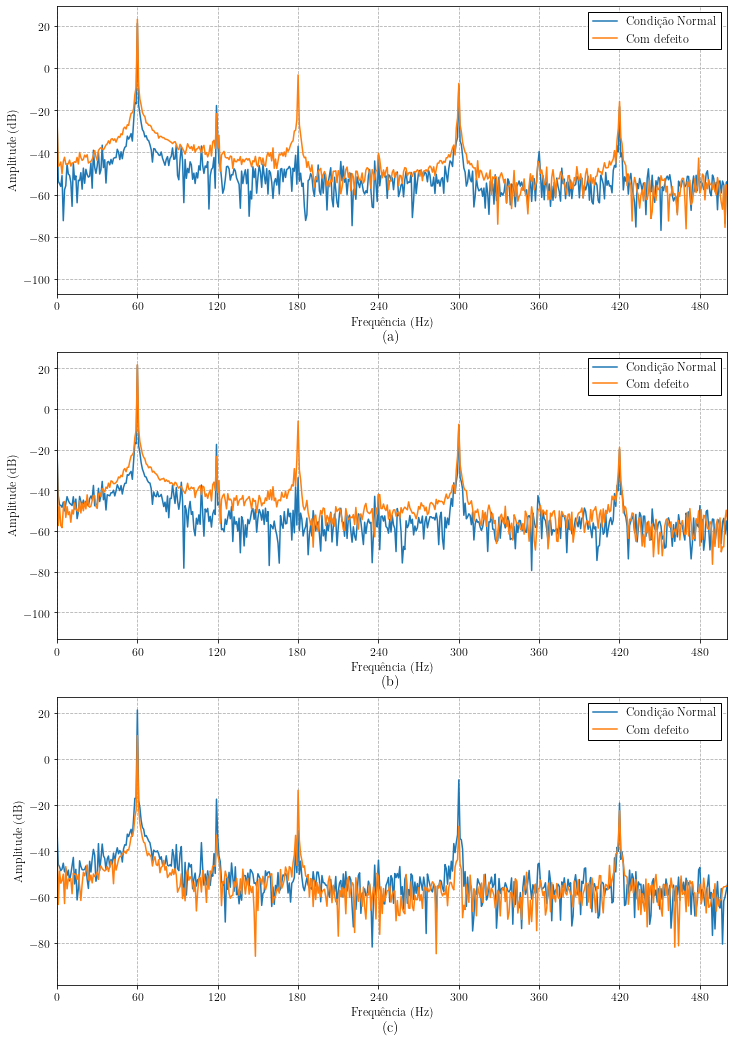

In [204]:
# sistema operando em carga

# obtenção do sample time e do número de amostras da FFT
N = cond_norm_carga["tempo"].size
ini = cond_norm_carga["tempo"].iloc[0]
fim = cond_norm_carga["tempo"].iloc[-1]
Ts = (fim - ini)/N
n = 8192
nn = 4096

# operando em condição normal
yf_a_n = np.fft.fft(cond_norm_carga["IA"], n)
yf_b_n = np.fft.fft(cond_norm_carga["IB"], n)
yf_c_n = np.fft.fft(cond_norm_carga["IC"], n)

yf_a_n = np.abs(yf_a_n[0:nn])/nn
yf_b_n = np.abs(yf_b_n[0:nn])/nn
yf_c_n = np.abs(yf_c_n[0:nn])/nn

# operando com defeito
yf_a_d = np.fft.fft(cond_def_carga["IA"], n)
yf_b_d = np.fft.fft(cond_def_carga["IB"], n)
yf_c_d = np.fft.fft(cond_def_carga["IC"], n)

yf_a_d = np.abs(yf_a_d[0:nn])/nn
yf_b_d = np.abs(yf_b_d[0:nn])/nn
yf_c_d = np.abs(yf_c_d[0:nn])/nn

# obtenção do vetor de frequência
xf = np.fft.fftfreq(n, Ts)
xf = xf[0:nn]
k = np.arange(0, 500, 60)

#plot dos sinais, operando em condição normal e com defeito 
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

ax[0].plot(xf, to_db(yf_a_n), xf, to_db(yf_a_d))
ax[0].grid(True, linestyle="--")
ax[0].set_xlim(0, 500)
ax[0].set_xticks(k)
ax[0].set_title("(a)", y=-0.1825)
ax[0].set_ylabel('Amplitude (dB)')
ax[0].set_xlabel('Frequência (Hz)')
ax[0].legend(["Condição Normal", "Com defeito"])

ax[1].plot(xf, to_db(yf_b_n), xf, to_db(yf_b_d))
ax[1].grid(True, linestyle="--")
ax[1].set_xlim(0, 500)
ax[1].set_xticks(k)
ax[1].set_title("(b)", y=-0.1825)
ax[1].set_ylabel('Amplitude (dB)')
ax[1].set_xlabel('Frequência (Hz)')
ax[1].legend(["Condição Normal", "Com defeito"])

ax[2].plot(xf, to_db(yf_c_n), xf, to_db(yf_c_d))
ax[2].grid(True, linestyle="--")
ax[2].set_xlim(0, 500)
ax[2].set_xticks(k)
ax[2].set_title("(c)", y=-0.1825)
ax[2].set_ylabel('Amplitude (dB)')
ax[2].set_xlabel('Frequência (Hz)')
ax[2].legend(["Condição Normal", "Com defeito"])

plt.savefig("fft_2.pdf", bbox_inches='tight')


Text(0.5, 0, 'Frequência [Hz]')

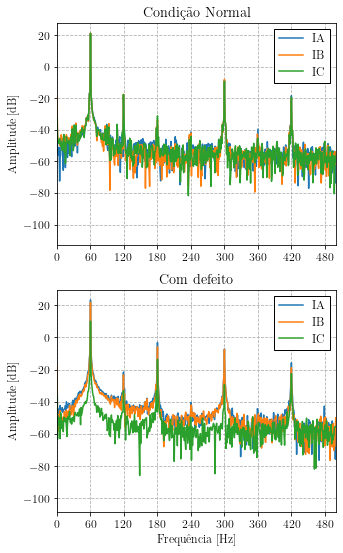

In [196]:
fig, ax = plt.subplots(2, 1, figsize=(5, 9))

ax[0].plot(xf, to_db(yf_a_n), xf, to_db(yf_b_n), xf, to_db(yf_c_n))
ax[0].grid(True, linestyle="--")
ax[0].set_xticks(k)
ax[0].set_xlim(0, 500)
ax[0].set_title("Condição Normal")
ax[0].set_ylabel('Amplitude [dB]')
ax[0].legend(['IA', 'IB', 'IC'])

ax[1].plot(xf, to_db(yf_a_d), xf, to_db(yf_b_d), xf, to_db(yf_c_d))
ax[1].grid(True, linestyle="--")
ax[1].set_xticks(k)
ax[1].set_xlim(0, 500)
ax[1].set_title("Com defeito")
ax[1].set_ylabel('Amplitude [dB]')
ax[1].legend(['IA', 'IB', 'IC'])
ax[1].set_xlabel('Frequência [Hz]')

## DFT

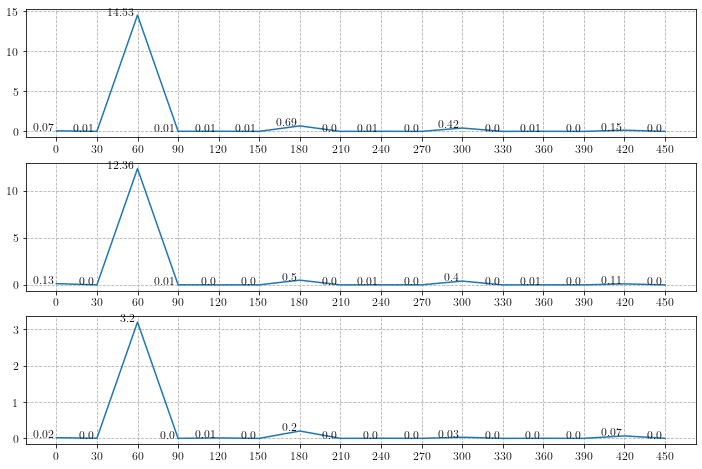

In [191]:
# exemplo de DFT

t = cond_def_carga["tempo"]
ia = cond_def_carga["IA"]
ib = cond_def_carga["IB"]
ic = cond_def_carga["IC"]

samp = 16

k = np.arange(0, 480, 30)
media_a = np.zeros(samp)
media_b = np.zeros(samp)
media_c = np.zeros(samp)

for n in k:
  s1 = np.sin(2*n*np.pi*t)
  ims_a = ia*s1
  ims_b = ib*s1
  ims_c = ic*s1

  c1 = np.cos(2*n*np.pi*t)
  imc_a = ia*c1
  imc_b = ib*c1
  imc_c = ic*c1

  media_a[n//30] = 2*np.sqrt(np.mean(ims_a)**2 + np.mean(imc_a)**2)
  media_b[n//30] = 2*np.sqrt(np.mean(ims_b)**2 + np.mean(imc_b)**2)
  media_c[n//30] = 2*np.sqrt(np.mean(ims_c)**2 + np.mean(imc_c)**2)

m_a_str = np.zeros(samp)
m_b_str = np.zeros(samp)
m_c_str = np.zeros(samp)

for m in np.arange(0, samp, 1):
  m_a_str[m] = round(media_a[m], 2)
  m_b_str[m] = round(media_b[m], 2)
  m_c_str[m] = round(media_c[m], 2)

fig, ax = plt.subplots(3, 1, figsize=(12, 8))
ax[0].plot(k, media_a)
ax[0].grid(True, linestyle="--")
ax[0].set_xticks(k)

for d, l, r in zip(k, media_a, m_a_str):
    ax[0].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="center")

ax[1].plot(k, media_b)
ax[1].grid(True, linestyle="--")
ax[1].set_xticks(k)

for d, l, r in zip(k, media_b, m_b_str):
    ax[1].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="center")

ax[2].plot(k, media_c)
ax[2].grid(True, linestyle="--")
ax[2].set_xticks(k)

for d, l, r in zip(k, media_c, m_c_str):
    ax[2].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="center")

In [198]:
1//Ts

7680.0

In [229]:
yf_a_d

array([0.06692394, 0.01092353, 0.01219224, ..., 0.00082386, 0.00151789,
       0.00130609])